In [465]:
import pandas as pd
import matplotlib.pyplot as plt

# импортирование DataFrame из csv-файла
df = pd.read_csv("Border_Crossing_Entry_Data.csv", sep = ",")



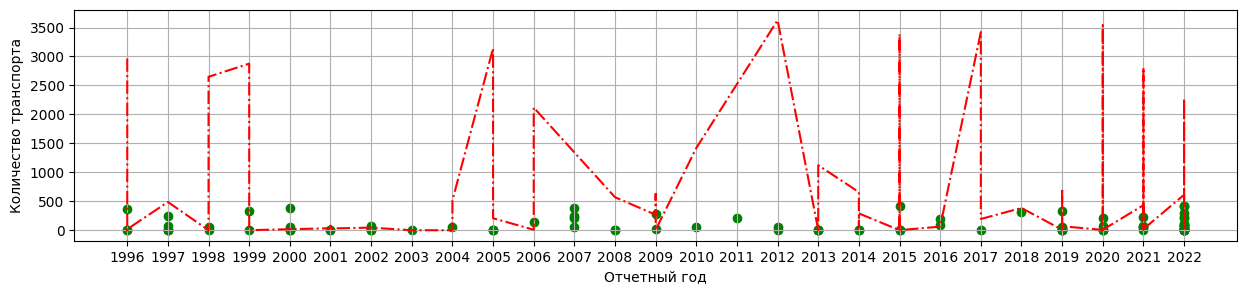

In [466]:
# фильтрация данных и построение графиков
trainMC = df[(df['Border'] == 'US-Mexico Border') &
             (df['Measure'] == 'Trains')].sort_values('Date')

busesMC = df[(df['Border'] == 'US-Mexico Border') &
             (df['Measure'] == 'Buses')].sort_values('Date')

dt1 = sorted([trainMC['Date'][i][3:] for i in trainMC['Date'].index])
dt2 = sorted([busesMC['Date'][i][3:] for i in busesMC['Date'].index])

figure, ax = plt.subplots(figsize=(15,3))
plt.scatter(dt1, trainMC["Value"], color = 'g', label = 'Trains')
plt.plot(dt2, busesMC["Value"], '-.r', label = 'Buses')
plt.xlabel('Отчетный год')
plt.ylabel('Количество транспорта')
plt.grid()
plt.show()

In [487]:
# группировка и агрегирование/сумма данных
dt = sorted([df['Date'][i][3:] for i in df['Date'].index])
data = df.groupby(['Measure', dt]).agg({'Value': 'sum'})
data
data.to_csv("Data.csv")